<a href="https://colab.research.google.com/github/OtavioBer/ProjetoAplicadoII/blob/main/Collam_Filmes_V6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

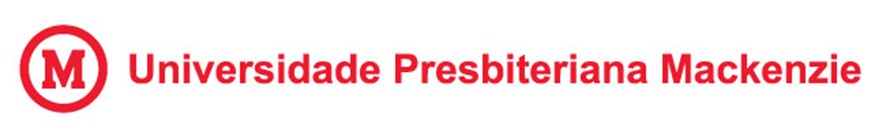

#<font color=blue>Projeto Aplicado II - Sistema de Recomendação

CURSO: Tecnologia em Ciências de Dados

SEMESTRE: 3º

COMPONENTE CURRICULAR / TEMA: Projeto Aplicado II - TURMA 03A

NOME DO PROFESSOR: ANDERSON ADAIME DE BORBA

INTEGRANTES E TIA:

1. Adrieli Machado Zaluski - 22503668
2. Caroline Ribeiro Ferreira - 22514635
3. Lais César Fonseca - 22500790
4. Liliane Gonçalves de Brito Ferraz - 22501142
5. Múcio Emanuel Feitosa Ferraz Filho - 22515925
6. Otavio Bernardo Scandiuzzi - 22511921

##<font color=blue>O que é o Sistema de Recomendação?

Um mecanismo de recomendação é uma classe de aprendizado de máquina que oferece sugestões relevantes ao cliente. Antes do sistema de recomendação, a grande tendência para comprar era aceitar sugestões de amigos. Mas agora o Google sabe quais notícias você vai ler, o Youtube sabe que tipo de vídeos você vai assistir com base em seu histórico de pesquisa, histórico de exibição ou histórico de compra. Um sistema de recomendação ajuda uma organização a criar clientes fiéis e construir a confiança deles nos produtos e serviços desejados para os quais vieram em seu site. Os sistemas de recomendação de hoje são tão poderosos que também podem lidar com o novo cliente que visitou o site pela primeira vez. Eles recomendam os produtos que estão em alta ou com alta classificação e também podem recomendar os produtos que trazem o máximo de lucro para a empresa. Um sistema de recomendação de filmes é um tipo de sistema de recomendação em que temos que recomendar filmes semelhantes ao usuário com base em seu interesse.

Importando bibliotecas e acessando o metadados

In [3]:
# Importando os pacotes a serem utilizados
import pandas as pd
import numpy as np
import ast

#Os dados podem ser encontrados em
### https://1drv.ms/u/s!AsB4w0fun-WjnGt3hDTatLJmnKy4?e=fx3dS4

In [4]:
# Importar o arquivo com os filmes e visualizar as primeiras linhas
filmes = pd.read_csv("movies_metadata.csv", low_memory = False)
filmes.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [5]:
# Importando o arquivo de avaliações e avaliando as primeiras linhas
avaliacoes = pd.read_csv("ratings.csv")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1.425942e+09
1,1,147,4.5,1.425942e+09
2,1,858,5.0,1.425942e+09
3,1,1221,5.0,1.425942e+09
4,1,1246,5.0,1.425942e+09


In [6]:
# Convertendo strings em listas de dicionários
filmes['genres'] = filmes['genres'].apply(ast.literal_eval)
# Extraindo os gêneros dos filmes
filmes['genre_names'] = filmes['genres'].apply(lambda x: [genre['name'] for genre in x])

In [7]:
# Filtrando somente as colunas necessários e renomeando nome das variaveis
# Seleciona somente as variaveis que iremos utilizar
filmes = filmes [['id','original_title','original_language','vote_count','release_date','genre_names']]
# Renomeia as variaveis
filmes.rename(columns = {'id':'ID_FILME','original_title':'TITULO','original_language':'LINGUAGEM','vote_count':'QT_AVALIACOES','release_date':'DT_LANCAMENTO','genre_names':'GENEROS'}, inplace = True)
# Exibe as primeiras linhas do arquivo tratado
filmes.head()

<ipython-input-7-9593fe8cd0c8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filmes.rename(columns = {'id':'ID_FILME','original_title':'TITULO','original_language':'LINGUAGEM','vote_count':'QT_AVALIACOES','release_date':'DT_LANCAMENTO','genre_names':'GENEROS'}, inplace = True)


,ID_FILME,TITULO,LINGUAGEM,QT_AVALIACOES,DT_LANCAMENTO,GENEROS
0,862,Toy Story,en,5415.0,1995-10-30,"[Animation, Comedy, Family]"
1,8844,Jumanji,en,2413.0,1995-12-15,"[Adventure, Fantasy, Family]"
2,15602,Grumpier Old Men,en,92.0,1995-12-22,"[Romance, Comedy]"
3,31357,Waiting to Exhale,en,34.0,1995-12-22,"[Comedy, Drama, Romance]"
4,11862,Father of the Bride Part II,en,173.0,1995-02-10,[Comedy]


In [8]:
# Filtrando somente as colunas necessários e renomeando nome das variaveis
# Seleciona somente as variaveis que iremos utilizar
avaliacoes = avaliacoes [['userId','movieId','rating']]
# Renomeia as variaveis
avaliacoes.rename(columns = {'userId':'ID_USUARIO','movieId':'ID_FILME','rating':'AVALIACAO'}, inplace = True)
# Exibe as primeiras linhas do arquivo tratado
avaliacoes.head()

<ipython-input-8-31a0fd7a6748>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avaliacoes.rename(columns = {'userId':'ID_USUARIO','movieId':'ID_FILME','rating':'AVALIACAO'}, inplace = True)


,ID_USUARIO,ID_FILME,AVALIACAO
0,1,110,1.0
1,1,147,4.5
2,1,858,5.0
3,1,1221,5.0
4,1,1246,5.0


In [9]:
# Verificando se há valores nulos
filmes.isna().sum()

ID_FILME          0
TITULO            0
LINGUAGEM        11
QT_AVALIACOES     6
DT_LANCAMENTO    87
GENEROS           0
dtype: int64

In [10]:
# Como são poucos os valores nulos iremos remover porque não terá impacto nenhum
filmes.dropna(inplace = True)

In [11]:
# Verificando se há valores nulos
filmes.isna().sum()

ID_FILME         0
TITULO           0
LINGUAGEM        0
QT_AVALIACOES    0
DT_LANCAMENTO    0
GENEROS          0
dtype: int64

In [12]:
# Verificando se há valores nulos
avaliacoes.isna().sum()

ID_USUARIO    0
ID_FILME      0
AVALIACAO     0
dtype: int64

In [13]:
# Verificando a quantidade de avaliacoes por usuarios
avaliacoes['ID_USUARIO'].value_counts()

8659    9279
4387    3370
4916    3051
5620    3037
5829    2955
        ... 
923        1
183        1
4304       1
6399       1
7580       1
Name: ID_USUARIO, Length: 11215, dtype: int64

In [14]:
# Vamos pegar o ID_USUARIO somente de usuários que fizeram mais de 50 avaliações
qt_avaliacoes = avaliacoes['ID_USUARIO'].value_counts() > 50
y = qt_avaliacoes[qt_avaliacoes].index
y.shape

(4342,)

In [15]:
# Visualizando os usuarios selecionados
y

Int64Index([ 8659,  4387,  4916,  5620,  5829,   741,  4160,  6513,  3437,
             9040,
            ...
             5861,  7589,  4080, 10056,   256,  1216,  8848, 10108,  4170,
            10659],
           dtype='int64', length=4342)

In [16]:
# visualizando o tamanho do dataset Avaliações
avaliacoes.shape

(1101603, 3)

In [17]:
# Pegando somente avaliacoes dos usuarios que avaliaram mais de 50 vezes
avaliacoes = avaliacoes[avaliacoes['ID_USUARIO'].isin(y)]

In [18]:
# visualizando o tamanho do dataset Avaliações
avaliacoes.shape

(972592, 3)

In [19]:
# Visualizando os DataFrame Avaliacoes
avaliacoes.head()

,ID_USUARIO,ID_FILME,AVALIACAO
59,4,223,4.0
60,4,415,4.0
61,4,648,4.0
62,4,1097,5.0
63,4,1197,4.0


In [20]:
# Visualizando o DataFrame Filmes
filmes.head()

,ID_FILME,TITULO,LINGUAGEM,QT_AVALIACOES,DT_LANCAMENTO,GENEROS
0,862,Toy Story,en,5415.0,1995-10-30,"[Animation, Comedy, Family]"
1,8844,Jumanji,en,2413.0,1995-12-15,"[Adventure, Fantasy, Family]"
2,15602,Grumpier Old Men,en,92.0,1995-12-22,"[Romance, Comedy]"
3,31357,Waiting to Exhale,en,34.0,1995-12-22,"[Comedy, Drama, Romance]"
4,11862,Father of the Bride Part II,en,173.0,1995-02-10,[Comedy]


In [21]:
# Vamos usar os filmes que possuem somente uma quantidade de avaliações superior a 50 avaliações
filmes = filmes[filmes['QT_AVALIACOES'] > 50]
# Vamos agrupar e visualizar a quantidade de filmes pela linguagem
filmes_linguagem = filmes['LINGUAGEM'].value_counts()
filmes_linguagem.head(20)

en    7395
fr     517
it     226
ja     215
es     110
de     109
ko      63
cn      60
hi      57
zh      53
sv      39
da      36
ru      29
pt      28
no      15
nl      12
th       8
pl       7
fa       7
hu       7
Name: LINGUAGEM, dtype: int64

In [22]:
# Selecionar somente os filmes da linguagem EN (English)
filmes = filmes[filmes['LINGUAGEM'] == 'en']

In [23]:
# Visualizar os tipos de dados das variaveis
filmes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7395 entries, 0 to 45441
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID_FILME       7395 non-null   object 
 1   TITULO         7395 non-null   object 
 2   LINGUAGEM      7395 non-null   object 
 3   QT_AVALIACOES  7395 non-null   float64
 4   DT_LANCAMENTO  7395 non-null   object 
 5   GENEROS        7395 non-null   object 
dtypes: float64(1), object(5)
memory usage: 404.4+ KB


In [24]:
avaliacoes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 972592 entries, 59 to 1101574
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID_USUARIO  972592 non-null  int64  
 1   ID_FILME    972592 non-null  int64  
 2   AVALIACAO   972592 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 29.7 MB


In [25]:
# Precisamos converter a variavel ID_FILME em inteiro
filmes['ID_FILME'] = filmes['ID_FILME'].astype(int)

In [26]:
# Verificando a quantidade de filmes pelo tamanho do arquivo
filmes.shape

(7395, 6)

In [27]:
filmes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7395 entries, 0 to 45441
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID_FILME       7395 non-null   int64  
 1   TITULO         7395 non-null   object 
 2   LINGUAGEM      7395 non-null   object 
 3   QT_AVALIACOES  7395 non-null   float64
 4   DT_LANCAMENTO  7395 non-null   object 
 5   GENEROS        7395 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 404.4+ KB


In [28]:
# Concatenando os dataframes
avaliacoes_e_filmes = avaliacoes.merge(filmes, on = 'ID_FILME')
avaliacoes_e_filmes.head()

,ID_USUARIO,ID_FILME,AVALIACAO,TITULO,LINGUAGEM,QT_AVALIACOES,DT_LANCAMENTO,GENEROS
0,4,223,4.0,Rebecca,en,346.0,1940-04-12,"[Drama, Mystery]"
1,12,223,5.0,Rebecca,en,346.0,1940-04-12,"[Drama, Mystery]"
2,46,223,4.5,Rebecca,en,346.0,1940-04-12,"[Drama, Mystery]"
3,49,223,4.5,Rebecca,en,346.0,1940-04-12,"[Drama, Mystery]"
4,53,223,5.0,Rebecca,en,346.0,1940-04-12,"[Drama, Mystery]"


In [29]:
# Vamos descartar os valores duplicados, para que não tenha problemas de termos o mesmo usuário avaliando o mesmo filme
# diversas vezes
avaliacoes_e_filmes.drop_duplicates(['ID_USUARIO','ID_FILME'], inplace = True)

In [30]:
# Verificando a quantidade de filmes com avaliacoes pelo tamanho do arquivo
avaliacoes_e_filmes.shape

(223505, 8)

In [31]:
# Verificando se há valores nulos
avaliacoes_e_filmes.isna().sum()

ID_USUARIO       0
ID_FILME         0
AVALIACAO        0
TITULO           0
LINGUAGEM        0
QT_AVALIACOES    0
DT_LANCAMENTO    0
GENEROS          0
dtype: int64

In [32]:
# Vamos visualizar as primeiras 20 linhas do arquivo
avaliacoes_e_filmes.head(20)

,ID_USUARIO,ID_FILME,AVALIACAO,TITULO,LINGUAGEM,QT_AVALIACOES,DT_LANCAMENTO,GENEROS
0,4,223,4.0,Rebecca,en,346.0,1940-04-12,"[Drama, Mystery]"
1,12,223,5.0,Rebecca,en,346.0,1940-04-12,"[Drama, Mystery]"
2,46,223,4.5,Rebecca,en,346.0,1940-04-12,"[Drama, Mystery]"
3,49,223,4.5,Rebecca,en,346.0,1940-04-12,"[Drama, Mystery]"
4,53,223,5.0,Rebecca,en,346.0,1940-04-12,"[Drama, Mystery]"
5,60,223,5.0,Rebecca,en,346.0,1940-04-12,"[Drama, Mystery]"
6,62,223,4.5,Rebecca,en,346.0,1940-04-12,"[Drama, Mystery]"
7,63,223,2.0,Rebecca,en,346.0,1940-04-12,"[Drama, Mystery]"
8,65,223,5.0,Rebecca,en,346.0,1940-04-12,"[Drama, Mystery]"
9,79,223,3.5,Rebecca,en,346.0,1940-04-12,"[Drama, Mystery]"


In [33]:
# Vamos descartar os valores duplicados, para que não tenha problemas de termos o mesmo usuário avaliando o mesmo filme
# diversas vezes
avaliacoes_e_filmes.drop_duplicates(['ID_USUARIO','ID_FILME'], inplace = True)

In [34]:
# DataFrame sem a variavel ID_FILME
avaliacoes_e_filmes.head(20)

,ID_USUARIO,ID_FILME,AVALIACAO,TITULO,LINGUAGEM,QT_AVALIACOES,DT_LANCAMENTO,GENEROS
0,4,223,4.0,Rebecca,en,346.0,1940-04-12,"[Drama, Mystery]"
1,12,223,5.0,Rebecca,en,346.0,1940-04-12,"[Drama, Mystery]"
2,46,223,4.5,Rebecca,en,346.0,1940-04-12,"[Drama, Mystery]"
3,49,223,4.5,Rebecca,en,346.0,1940-04-12,"[Drama, Mystery]"
4,53,223,5.0,Rebecca,en,346.0,1940-04-12,"[Drama, Mystery]"
5,60,223,5.0,Rebecca,en,346.0,1940-04-12,"[Drama, Mystery]"
6,62,223,4.5,Rebecca,en,346.0,1940-04-12,"[Drama, Mystery]"
7,63,223,2.0,Rebecca,en,346.0,1940-04-12,"[Drama, Mystery]"
8,65,223,5.0,Rebecca,en,346.0,1940-04-12,"[Drama, Mystery]"
9,79,223,3.5,Rebecca,en,346.0,1940-04-12,"[Drama, Mystery]"


In [35]:
# Exportando os titulos
lista_titulos = avaliacoes_e_filmes['TITULO'].unique()
df_lista_titulos = pd.DataFrame(lista_titulos)
df_lista_titulos.to_excel('Lista_Titulos.xlsx')

## Método de recomendação

In [36]:
import pandas as pd
import numpy as np

# Função para calcular a distância euclidiana entre duas listas
def euclidean_distance(list1, list2):
    return np.linalg.norm(list1 - list2)

# Função para calcular a similaridade entre usuários
def user_similarity(user1, user2):
    return euclidean_distance(user1, user2)

# Função para calcular a similaridade entre gêneros
def genre_similarity(genre1, genre2):
    return 1 if set(genre1) == set(genre2) else 0

def sistema_de_recomendacao(titulo, avaliacoes_e_filmes):
    filme_referencia = avaliacoes_e_filmes[avaliacoes_e_filmes['TITULO'] == titulo]

    # Filtrando o dataframe para excluir o filme de referência
    avaliacoes_outros_filmes = avaliacoes_e_filmes[avaliacoes_e_filmes['TITULO'] != titulo]

    # Calculando a similaridade entre usuários
    similaridade_usuarios = []
    for _, row in avaliacoes_outros_filmes.iterrows():
        similaridade = euclidean_distance(row['AVALIACAO'], filme_referencia['AVALIACAO'].values[0])
        similaridade_usuarios.append(similaridade)

    avaliacoes_outros_filmes['Similaridade_Usuarios'] = similaridade_usuarios

    # Calculando a similaridade entre os gêneros dos filmes
    generos_referencia = filme_referencia['GENEROS'].values[0]
    similaridade_generos = []
    for generos in avaliacoes_outros_filmes['GENEROS']:
        similaridade = genre_similarity(generos, generos_referencia)
        similaridade_generos.append(similaridade)

    avaliacoes_outros_filmes['Similaridade_Generos'] = similaridade_generos

    # Combinando as similaridades
    avaliacoes_outros_filmes['Total_Similaridade'] = 0.7 * avaliacoes_outros_filmes['Similaridade_Usuarios'] + 0.3 * avaliacoes_outros_filmes['Similaridade_Generos']

    # Ordenando os filmes por similaridade
    recomendacoes = avaliacoes_outros_filmes.sort_values(by='Total_Similaridade', ascending=False).head(3).drop_duplicates(subset='TITULO')

    return recomendacoes




## Previsões de sugestões de filmes

In [37]:
# Recomendações para o filme Toy Story
filme_de_interesse = 'Toy Story'
recomendacoes = sistema_de_recomendacao(filme_de_interesse, avaliacoes_e_filmes)
recomendacoes

<ipython-input-36-a5a2ff0dac86>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avaliacoes_outros_filmes['Similaridade_Usuarios'] = similaridade_usuarios
<ipython-input-36-a5a2ff0dac86>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avaliacoes_outros_filmes['Similaridade_Generos'] = similaridade_generos
<ipython-input-36-a5a2ff0dac86>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,ID_USUARIO,ID_FILME,AVALIACAO,TITULO,LINGUAGEM,QT_AVALIACOES,DT_LANCAMENTO,GENEROS,Similaridade_Usuarios,Similaridade_Generos,Total_Similaridade
199514,7849,532,0.5,A Close Shave,en,223.0,1995-12-24,"[Family, Animation, Comedy]",2.5,1,2.05
14913,6205,585,0.5,"Monsters, Inc.",en,6150.0,2001-11-01,"[Animation, Comedy, Family]",2.5,1,2.05


In [38]:
# Recomendações para o filme Sin City
filme_de_interesse2 = 'Sin City'
recomendacoes2 = sistema_de_recomendacao(filme_de_interesse2, avaliacoes_e_filmes)
recomendacoes2

<ipython-input-36-a5a2ff0dac86>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avaliacoes_outros_filmes['Similaridade_Usuarios'] = similaridade_usuarios
<ipython-input-36-a5a2ff0dac86>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avaliacoes_outros_filmes['Similaridade_Generos'] = similaridade_generos
<ipython-input-36-a5a2ff0dac86>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,ID_USUARIO,ID_FILME,AVALIACAO,TITULO,LINGUAGEM,QT_AVALIACOES,DT_LANCAMENTO,GENEROS,Similaridade_Usuarios,Similaridade_Generos,Total_Similaridade
209170,7746,2099,0.5,Raw Deal,en,159.0,1986-06-06,"[Action, Crime, Thriller]",2.5,1,2.05
185771,1627,393,0.5,Kill Bill: Vol. 2,en,4061.0,2004-04-16,"[Action, Crime, Thriller]",2.5,1,2.05
45263,6307,1089,0.5,Point Break,en,861.0,1991-07-12,"[Action, Thriller, Crime]",2.5,1,2.05


In [39]:
# Recomendações para o filme A Close Shave
filme_de_interesse2 = 'A Close Shave'
recomendacoes2 = sistema_de_recomendacao(filme_de_interesse2, avaliacoes_e_filmes)
recomendacoes2

<ipython-input-36-a5a2ff0dac86>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avaliacoes_outros_filmes['Similaridade_Usuarios'] = similaridade_usuarios
<ipython-input-36-a5a2ff0dac86>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avaliacoes_outros_filmes['Similaridade_Generos'] = similaridade_generos
<ipython-input-36-a5a2ff0dac86>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,ID_USUARIO,ID_FILME,AVALIACAO,TITULO,LINGUAGEM,QT_AVALIACOES,DT_LANCAMENTO,GENEROS,Similaridade_Usuarios,Similaridade_Generos,Total_Similaridade
138599,8039,1267,5.0,Meet the Robinsons,en,787.0,2007-03-23,"[Animation, Comedy, Family]",3.0,1,2.4


In [40]:
# Recomendações para o filme Point Break
filme_de_interesse2 = 'Point Break'
recomendacoes2 = sistema_de_recomendacao(filme_de_interesse2, avaliacoes_e_filmes)
recomendacoes2

<ipython-input-36-a5a2ff0dac86>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avaliacoes_outros_filmes['Similaridade_Usuarios'] = similaridade_usuarios
<ipython-input-36-a5a2ff0dac86>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avaliacoes_outros_filmes['Similaridade_Generos'] = similaridade_generos
<ipython-input-36-a5a2ff0dac86>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,ID_USUARIO,ID_FILME,AVALIACAO,TITULO,LINGUAGEM,QT_AVALIACOES,DT_LANCAMENTO,GENEROS,Similaridade_Usuarios,Similaridade_Generos,Total_Similaridade
209144,3631,2099,0.5,Raw Deal,en,159.0,1986-06-06,"[Action, Crime, Thriller]",3.0,1,2.4
185809,5811,393,0.5,Kill Bill: Vol. 2,en,4061.0,2004-04-16,"[Action, Crime, Thriller]",3.0,1,2.4
167450,1379,2140,0.5,Kiss of the Dragon,en,304.0,2001-07-06,"[Action, Crime, Thriller]",3.0,1,2.4


## Conclusão

O método de recomendação em aprendizado de máquina envolve a previsão de preferências do usuário com base em dados históricos. A distância euclidiana é uma métrica utilizada para medir a semelhança entre dois pontos em um espaço multidimensional. No contexto de recomendação, essa distância pode ser aplicada para calcular a proximidade entre perfis de usuários ou itens. A similaridade entre dois pontos é medida pela distância euclidiana entre eles. Quanto menor a distância, maior a semelhança.
No caso de recomendação de itens, por exemplo, os usuários com históricos semelhantes terão perfis mais próximos no espaço, indicando gostos similares. Assim, itens preferidos por usuários com perfis próximos podem ser recomendados.
